# Selecting the most suitable 1x12 drivetrain

# Problem description
A lot of bike riders are using data acquisition devices to log sensor data like GPS, heart rate, cadence and other. A biker is currently riding with 2x10 gear system (2 front chainrings and 10 rear cogs). The rider is considering an upgrade to 1x12 system to benefit from the latest developments in the industry. The following report analysis the most used gear ratio from existing logs (based on cadence and speed) of the user and suggest most suitable number of teeth for single front chainring and gear range for the cassette.

# Introduction
The rider of interest is currently using 2x11 Shimano drive system. The front chainrings are 50 and 34 teeth. The rear cassette is of range 11-28, or more precisely 11-12-13-14-15-17-19-21-23-25-28 teeth. The tyres are ETRTO 25-622 with circumference of 2.105m.

In [1]:
import numpy as np
from datetime import datetime, timedelta
from typing import Dict, Union, Optional,Tuple
import matplotlib.pyplot as plt
import pandas as pd
import os
import fitdecode
import seaborn as sns
import matplotlib.dates as mdates

# Data loading
The user uses a Garmin device. A *.fit file is created for each ride. All fit files are collected in a folder. There are three ride types: mountain, road and on a stationary trainer. The analysis will focus on road rides as the 1x12 upgrade is intended for the road bike.

In [2]:
# Let's print what data we have in a random file
with fitdecode.FitReader('2020-07-30-07-05-29.fit') as fit_file:
    for frame in fit_file:
        if isinstance(frame, fitdecode.records.FitDataMessage) and frame.name == 'record':
             # This frame contains data about a "track point".
            for field in frame.fields:
                print(field.name)
#there are also frame.name = 'lap', but they do not contain the information we need.

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_

unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
spe

enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanc

heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altit

unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
en

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unkn

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperatu

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
en

In [3]:
# The names of the columns we will use in our DataFrame. For the data we will be getting
# from the FIT data, we use the same name as the field names to make it easier to parse the data.
# more data is loaded than needed; it might be used in other analysis
RECORDS_COLUMN_NAMES = ['latitude', 'longitude', 'lap', 'altitude', 'timestamp', 'heart_rate', 'cadence', \
                       'speed', 'distance', 'temperature']
# "enhanced_speed", "enhanced_altitude", "fractional_cadence" do not have any additional information

def get_fit_data(frame: fitdecode.records.FitDataMessage) -> Optional[Dict[str, Union[float, int, str, datetime]]]:
    """
    Extract data from a FIT frame, representing a track point,
    and return it as a dict. Only activities with track are returned; stationary activities do not have latitude
    and longitude and the function returns None
    """
    data: Dict[str, Union[float, int, str, datetime]] = {}
    
    if not (frame.has_field('position_lat') and frame.has_field('position_long')):
        # Frame does not have any latitude or longitude data. We will ignore these frames in order to keep things simple
        return None
    else:
        data['latitude'] = frame.get_value('position_lat') / ((2**32) / 360) #saved in degrees
        data['longitude'] = frame.get_value('position_long') / ((2**32) / 360) #saved in degrees
    
    for field in RECORDS_COLUMN_NAMES[3:]:
        if frame.has_field(field):
            data[field] = frame.get_value(field)
    
    return data
    

def get_dataframe(fname: str) -> Tuple[pd.DataFrame]:
    """
    Takes the path to a FIT file (as a string) and returns
    DataFrame, containing data about the individual records.
    """

    records_data = []
    lap_no = 1
    with fitdecode.FitReader(fname) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'record':
                    single_record_data = get_fit_data(frame)
                    if single_record_data is not None:
                        single_record_data['lap'] = lap_no
                        records_data.append(single_record_data)
                elif frame.name == 'lap':
                    lap_no += 1
    
    # Create DataFrames from the data we have collected. If any information is missing,
    # it will show up as a null value or "NaN" in the DataFrame.
    record_df = pd.DataFrame(records_data, columns=RECORDS_COLUMN_NAMES)
    
    return record_df


# path = '2020-07-30-07-05-29.fit' # Yambol
path = '2017-12-07-08-38-00.fit' # ?


records_df = get_dataframe(path)

In [4]:
def is_road_file(file_path):
    has_cadence = False
    with fitdecode.FitReader(file_path) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'device_info':
                    for field in frame.fields:
                        if field.name == "antplus_device_type":
                            if field.value == "fitness_equipment":
                                return False
                            if field.value == "bike_cadence":
                                #only the road bike has cadance sensor
                                has_cadence = True
                if frame.name == "record":
                    # we have checked the header 
                    break
    return has_cadence

def get_all_road_rides(folder_path):
    folder_road_rides = pd.DataFrame()
    for entry in os.scandir(folder_path):
        if entry.is_file and entry.name.split(".")[-1] == "fit":
            if is_road_file(entry.path):
                file_frame = get_dataframe(entry.path)
                average_speed = file_frame.speed.mean()
                average_cadance = file_frame.cadence.mean()
                distance = file_frame.distance.iloc[-1]
                print(f"""{entry.name}:
                    average speed = {average_speed}
                    average cadence = {average_cadance}
                    distance = {distance}""")
                folder_road_rides = pd.concat([folder_road_rides, file_frame], ignore_index=True)
    return folder_road_rides

# EDA

Let's load only one ride and inspect the data inside. The same ride is uploaded on https://www.strava.com/activities/5537229796 Comparison with the upload will be made.

In [5]:
road_rides = get_all_road_rides(r"C:\Users\a1048794\OneDrive - PROD - sensata.com Azure AD (sso.sensata.com) (Not O365)\Documents\personal\SoftUni\Data science\project\data")
road_rides

2021-06-27-08-00-53.fit:
                    average speed = 7.703838172560895
                    average cadence = 63.287750865051905
                    distance = 165349.71


,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25
...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35


In [6]:
road_rides.dtypes

latitude                   float64
longitude                  float64
lap                          int64
altitude                   float64
timestamp      datetime64[ns, UTC]
heart_rate                 float64
cadence                    float64
speed                      float64
distance                   float64
temperature                  int64
dtype: object

In [7]:
road_rides.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,7267.0,42.666341,0.046488,42.566613,42.626655,42.682601,42.706885,42.733819
longitude,7267.0,23.649968,0.247663,23.138662,23.436341,23.722136,23.860254,24.001795
lap,7267.0,17.209440,9.188901,1.000000,10.000000,17.000000,24.000000,34.000000
altitude,7267.0,663.015770,103.385607,510.200000,578.200000,637.200000,734.400000,924.200000
heart_rate,7249.0,139.485308,20.567335,72.000000,127.000000,142.000000,155.000000,179.000000
cadence,7225.0,63.287751,34.137560,0.000000,37.000000,80.000000,89.000000,114.000000
speed,7267.0,7.703838,3.842450,0.000000,4.600000,7.521000,10.245000,17.878000
distance,7267.0,83664.625826,46002.432023,4.900000,49117.565000,84490.640000,117117.800000,165349.710000
temperature,7267.0,26.899684,5.011793,19.000000,22.000000,26.000000,31.000000,38.000000


The data seems realistic and comparable with the analysis provided on Strava web page. The measuring units are as follows:
- latitude and longitude : °
- altitude : m
- heart_rate : bpm
- cadence : rpm
- speed : m/s (not km/h)
- distance : m
- temperature : °C

## Sampling rate

At first glance it looks like the sampling is each second. Let's confirm.

In [8]:
sampling_time = [np.NaN]
for i in range(1, len(road_rides)):
    sampling_time.append((road_rides.timestamp.iloc[i] - road_rides.timestamp.iloc[i-1]).total_seconds())
sampling_time = pd.Series(sampling_time)

In [9]:
def to_seconds(x):
    return x.total_seconds()


sampling_time = road_rides.timestamp.diff().apply(to_seconds) #.apply(total_seconds())

In [10]:
sampling_time.unique()

array([      nan, 1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 4.000e+00,
       7.000e+00, 5.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.900e+01,
       2.100e+01, 1.000e+01, 1.400e+01, 1.300e+01, 1.500e+01, 1.100e+01,
       1.800e+01, 2.200e+01, 1.700e+01, 2.300e+01, 2.000e+01, 3.100e+01,
       2.500e+01, 2.800e+01, 2.600e+01, 1.600e+01, 1.959e+03, 5.000e+01])

The sampling is not every second. There is also one very long duration of 1959s. Let's try to find what is the logic.

In [11]:
sampling_time.name = "duration"
road_rides = pd.concat([road_rides, sampling_time], axis=1)

In [12]:
road_rides[road_rides.duration > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0


In [13]:
road_rides[3920:3930]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0


Looking into the row with the highest duration and the GPS coordinates, we quickly realize the rider has been on a restaurant stop. It looks like the device manages logging frequency internally, most probably to preserve battery life. 

In [14]:
road_rides[road_rides.duration > 10].sample(10)

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
330,42.699756,23.369114,2,530.8,2021-06-27 05:16:53+00:00,88.0,0.0,0.000,7323.91,20,19.0
640,42.706885,23.456884,3,528.0,2021-06-27 05:45:42+00:00,78.0,NaN,0.000,14647.95,20,14.0
1975,42.717120,23.874638,11,768.8,2021-06-27 06:59:12+00:00,106.0,0.0,0.961,51266.98,23,17.0
4392,42.620165,23.763566,20,705.6,2021-06-27 09:21:07+00:00,114.0,0.0,0.000,98039.27,29,11.0
580,42.706885,23.456884,3,529.2,2021-06-27 05:36:40+00:00,85.0,0.0,0.000,14647.95,20,11.0
618,42.706885,23.456884,3,528.6,2021-06-27 05:42:11+00:00,75.0,NaN,0.000,14647.95,20,25.0
635,42.706885,23.456884,3,527.8,2021-06-27 05:45:02+00:00,79.0,NaN,0.000,14647.95,20,12.0
335,42.699756,23.369114,2,530.8,2021-06-27 05:17:48+00:00,93.0,0.0,0.000,7323.91,21,14.0
620,42.706885,23.456884,3,528.4,2021-06-27 05:42:42+00:00,75.0,NaN,0.000,14647.95,20,25.0
571,42.706885,23.456884,3,529.2,2021-06-27 05:35:53+00:00,88.0,0.0,0.000,14647.95,20,14.0


The device increases logging time when the speed and cadence are 0.

## Heart rate

In [15]:
road_rides.heart_rate.unique()

array([114., 115., 113., 110., 109., 108., 107., 104., 101., 102., 105.,
       111., 116., 117., 118., 120., 123., 124., 125., 126., 127., 130.,
       132., 133., 134., 136., 137., 138., 139., 141., 140., 135., 131.,
       142., 143., 145., 146., 149., 153., 155., 156., 151., 148., 128.,
       122., 119., 112., 144., 147., 129., 121., 106., 150.,  nan,  99.,
        96.,  95.,  92.,  88.,  85.,  89.,  94.,  91.,  93.,  90.,  87.,
        84., 100.,  97.,  86.,  83., 103.,  98.,  81.,  78.,  75.,  80.,
        79.,  82.,  76.,  77.,  73.,  72., 152., 154., 158., 160., 161.,
       162., 159., 157., 163., 164., 166., 167., 168., 165., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179.])

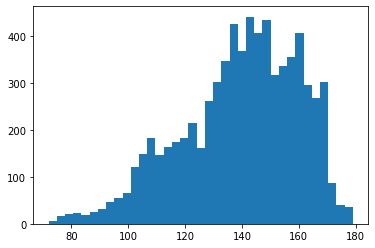

In [16]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

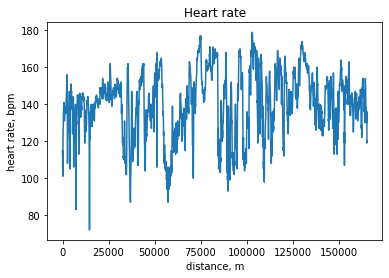

In [17]:
plt.plot(road_rides.distance, road_rides.heart_rate)
plt.title("Heart rate")
plt.xlabel("distance, m")
plt.ylabel("heart rate, bpm")
plt.show()

In [18]:
road_rides[pd.isna(road_rides.heart_rate)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
316,42.699740,23.368918,2,531.2,2021-06-27 05:15:33+00:00,NaN,0.0,4.852,7307.23,20,1.0
2365,42.703722,23.912650,12,872.2,2021-06-27 07:12:30+00:00,NaN,33.0,14.882,55790.76,21,2.0
2384,42.703427,23.916309,12,848.4,2021-06-27 07:12:56+00:00,NaN,0.0,13.688,56163.61,21,1.0
2385,42.703408,23.916463,12,847.2,2021-06-27 07:12:57+00:00,NaN,0.0,14.052,56177.66,21,1.0
2395,42.702626,23.918040,12,837.6,2021-06-27 07:13:08+00:00,NaN,0.0,15.498,56341.18,21,1.0
2396,42.702669,23.918225,12,836.4,2021-06-27 07:13:09+00:00,NaN,0.0,15.704,56356.88,21,1.0
2427,42.702594,23.922981,12,804.2,2021-06-27 07:13:47+00:00,NaN,0.0,15.414,56929.23,22,1.0
2428,42.702431,23.923335,12,802.2,2021-06-27 07:13:49+00:00,NaN,0.0,15.256,56959.74,22,2.0
2453,42.702987,23.924390,12,784.0,2021-06-27 07:14:18+00:00,NaN,0.0,9.751,57298.08,22,1.0
2454,42.703046,23.924475,12,783.4,2021-06-27 07:14:19+00:00,NaN,0.0,8.640,57306.72,22,1.0


There are some missing hear rate entries, most probably due to device communication issue or pad electrical contact to the body. The amount of missing data is low and it is not also not essential for the defined problem.

Heart rate could be used for some approximation for power. Due to physiological reasons, the heart rate has significant lag from power output.

## Cadence

In [19]:
np.sort(road_rides.cadence.unique())

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114.,  nan])

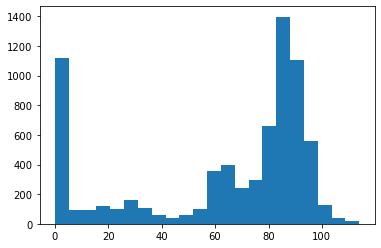

In [20]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

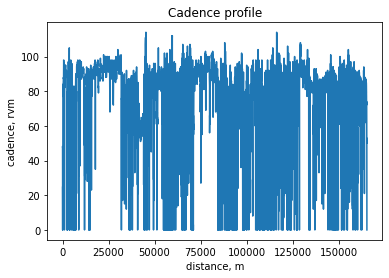

In [21]:
plt.plot(road_rides.distance, road_rides.cadence)
plt.title("Cadence profile")
plt.xlabel("distance, m")
plt.ylabel("cadence, rvm")
plt.show()

In [22]:
road_rides[pd.isna(road_rides.cadence)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
605,42.706885,23.456884,3,528.8,2021-06-27 05:39:43+00:00,77.0,NaN,0.000,14647.95,20,4.0
606,42.706885,23.456884,3,529.0,2021-06-27 05:40:03+00:00,81.0,NaN,0.000,14647.95,20,20.0
607,42.706885,23.456884,3,529.0,2021-06-27 05:40:06+00:00,85.0,NaN,0.000,14647.95,20,3.0
608,42.706885,23.456884,3,528.6,2021-06-27 05:40:37+00:00,82.0,NaN,0.000,14647.95,20,31.0
609,42.706885,23.456884,3,528.6,2021-06-27 05:40:45+00:00,79.0,NaN,0.000,14647.95,20,8.0
610,42.706885,23.456884,3,528.6,2021-06-27 05:40:49+00:00,76.0,NaN,0.000,14647.95,20,4.0
611,42.706885,23.456884,3,528.6,2021-06-27 05:40:53+00:00,79.0,NaN,0.000,14647.95,20,4.0
612,42.706885,23.456884,3,528.6,2021-06-27 05:41:05+00:00,76.0,NaN,0.000,14647.95,20,12.0
613,42.706885,23.456884,3,528.6,2021-06-27 05:41:08+00:00,73.0,NaN,0.000,14647.95,20,3.0
614,42.706885,23.456884,3,528.6,2021-06-27 05:41:14+00:00,76.0,NaN,0.000,14647.95,20,6.0


In [23]:
road_rides[640:655]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
640,42.706885,23.456884,3,528.0,2021-06-27 05:45:42+00:00,78.0,NaN,0.000,14647.95,20,14.0
641,42.706885,23.456884,3,528.0,2021-06-27 05:45:45+00:00,75.0,NaN,0.000,14647.95,20,3.0
642,42.706885,23.456884,3,528.0,2021-06-27 05:45:51+00:00,72.0,NaN,0.000,14647.95,20,6.0
643,42.706886,23.456884,3,528.0,2021-06-27 05:45:56+00:00,77.0,NaN,0.000,14648.05,20,5.0
644,42.706913,23.456874,3,528.0,2021-06-27 05:45:58+00:00,82.0,NaN,2.351,14652.93,20,2.0
645,42.706925,23.456858,3,528.0,2021-06-27 05:45:59+00:00,83.0,NaN,2.678,14655.61,20,1.0
646,42.706938,23.456839,3,528.0,2021-06-27 05:46:00+00:00,85.0,NaN,2.725,14658.33,20,1.0
647,42.706953,23.456819,3,528.0,2021-06-27 05:46:01+00:00,88.0,0.0,3.079,14661.41,20,1.0
648,42.707001,23.456792,3,528.0,2021-06-27 05:46:03+00:00,91.0,0.0,2.622,14666.92,20,2.0
649,42.707052,23.456800,3,528.0,2021-06-27 05:46:05+00:00,94.0,0.0,3.210,14672.97,20,2.0


There are some entries for cadence with nan value. These values are recorded when the cranks are not rotated. The nan values become 0 and than return to normal. Checking the GPS coordinates reveals that this is a gas station where the teammates meet for the ride. The bike was not moving.

In [24]:
road_rides[(road_rides.cadence == 0) & (road_rides.speed > 0)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
6,42.671719,23.295143,1,585.2,2021-06-27 05:01:00+00:00,110.0,0.0,4.581,37.78,25,2.0
7,42.671739,23.295108,1,585.4,2021-06-27 05:01:01+00:00,109.0,0.0,4.563,42.35,25,1.0
8,42.671772,23.295050,1,585.0,2021-06-27 05:01:02+00:00,108.0,0.0,4.563,46.91,25,1.0
9,42.671810,23.294953,1,584.8,2021-06-27 05:01:04+00:00,108.0,0.0,5.020,56.80,25,2.0
20,42.672510,23.295226,1,584.8,2021-06-27 05:01:22+00:00,105.0,0.0,6.186,148.08,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7012,42.706526,23.153673,33,642.0,2021-06-27 11:43:08+00:00,138.0,0.0,6.933,162130.74,35,3.0
7035,42.705199,23.148504,33,644.0,2021-06-27 11:44:25+00:00,127.0,0.0,1.652,162588.24,35,4.0
7036,42.705197,23.148478,33,644.2,2021-06-27 11:44:27+00:00,124.0,0.0,1.297,162590.35,35,2.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0


There are a lot of entries when the bike is moving by inertia and the cranks are not rotated.

In [25]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)] # this range is really low cadence

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
10,42.671826,23.294951,1,585.0,2021-06-27 05:01:05+00:00,108.0,25.0,5.197,61.99,25,1.0
11,42.671919,23.295020,1,585.0,2021-06-27 05:01:08+00:00,107.0,25.0,5.729,79.08,25,3.0
12,42.671975,23.294993,1,585.0,2021-06-27 05:01:09+00:00,107.0,25.0,5.561,84.64,25,1.0
13,42.672063,23.294997,1,585.0,2021-06-27 05:01:11+00:00,107.0,25.0,5.365,95.55,25,2.0
14,42.672109,23.295174,1,585.0,2021-06-27 05:01:12+00:00,107.0,14.0,5.244,100.79,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7154,42.695021,23.148388,33,711.0,2021-06-27 11:50:36+00:00,141.0,21.0,4.311,163994.40,33,4.0
7260,42.685669,23.138902,34,772.2,2021-06-27 11:57:08+00:00,129.0,25.0,2.771,165334.41,35,3.0
7261,42.685640,23.138962,34,772.2,2021-06-27 11:57:11+00:00,125.0,25.0,1.110,165339.99,35,3.0
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0


In [26]:
# road_rides[17:25]

In [27]:
# road_rides[90:110]

In [28]:
# road_rides[270:280]

In [29]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)].sample(20) 

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
4200,42.622469,23.799720,19,643.6,2021-06-27 09:11:14+00:00,128.0,24.0,9.013,94628.97,29,6.0
5692,42.613898,23.563638,25,596.2,2021-06-27 10:21:19+00:00,143.0,6.0,11.803,124265.33,31,2.0
14,42.672109,23.295174,1,585.0,2021-06-27 05:01:12+00:00,107.0,14.0,5.244,100.79,25,1.0
5322,42.584560,23.670301,23,765.8,2021-06-27 10:04:54+00:00,114.0,5.0,14.603,113668.08,28,1.0
5744,42.620995,23.541106,26,594.8,2021-06-27 10:24:36+00:00,160.0,13.0,11.430,126311.86,32,6.0
5384,42.589878,23.663962,23,696.4,2021-06-27 10:06:16+00:00,135.0,28.0,14.528,114912.57,28,1.0
4894,42.585454,23.724730,22,847.4,2021-06-27 09:43:09+00:00,167.0,22.0,4.563,105497.61,30,3.0
4379,42.620110,23.763173,20,706.8,2021-06-27 09:19:57+00:00,130.0,3.0,2.529,97947.38,29,2.0
2812,42.661369,23.995882,14,577.2,2021-06-27 07:30:34+00:00,130.0,23.0,11.486,66010.87,27,2.0
3957,42.653936,23.822908,18,729.0,2021-06-27 09:01:25+00:00,120.0,15.0,4.133,89940.12,26,3.0


There are a moderate amount of entries with low cadence. Picking random samples and checking the GPS coordinates, indicates most of them are in urban areas where the rider has to adapt to signal lights and road traffic. This rates  happen during acceleration from a stop when too high gear is engaged. Other possible use of low cadence is during out of the saddle efforts.

## Speed

In [30]:
pd.isna(road_rides.speed).any()

False

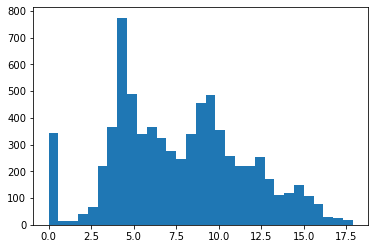

In [31]:
plt.hist(road_rides.speed, bins="fd")
plt.show()

Every entry has a speed value, that could be 0m/s.

## Distance

There are two possible ways to calculate distance
- by integrating speed over time
- by calculating the length of the GPS track.

Integration over the speed will be performed to compare the results.

In [32]:
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0


In [33]:
calculated_distance = (road_rides.duration * road_rides.speed).cumsum()
calculated_distance.name = "calc_distance"
calculated_distance

0              NaN
1            4.731
2            9.527
3           14.323
4           19.007
           ...    
7262    178754.284
7263    178760.275
7264    178763.037
7265    178763.037
7266    178763.037
Name: calc_distance, Length: 7267, dtype: float64

The first entry for distance is known to the device. Most probably there is an initiation sensor reading that allows it to be calculated. The total distance differ.

In [34]:
calculated_distance[0] = 0
calculated_distance = calculated_distance + road_rides.distance[0]
calculated_distance

0            4.900
1            9.631
2           14.427
3           19.223
4           23.907
           ...    
7262    178759.184
7263    178765.175
7264    178767.937
7265    178767.937
7266    178767.937
Name: calc_distance, Length: 7267, dtype: float64

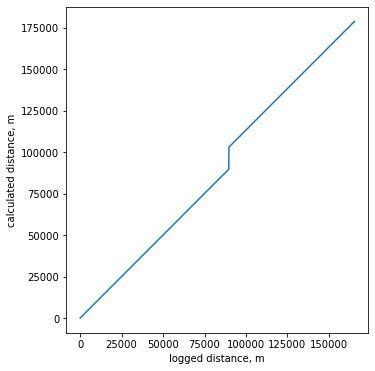

In [35]:
plt.figure(figsize=(6,6))
plt.plot(road_rides.distance, calculated_distance)
plt.xlabel("logged distance, m")
plt.ylabel("calculated distance, m")
plt.gca().set_aspect('equal')
plt.show()

In [36]:
road_rides = pd.concat([road_rides, calculated_distance], axis=1)
road_rides[(road_rides.duration * road_rides.speed) > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance
286,42.697928,23.360775,2,529.2,2021-06-27 05:13:50+00:00,136.0,32.0,9.583,6625.03,20,12.0,6634.811
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992
6534,42.709744,23.273300,31,578.8,2021-06-27 11:13:45+00:00,164.0,91.0,10.460,151294.11,34,50.0,164716.298


In [37]:
strange_secton = road_rides[3920:3930]
strange_secton

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0,89700.578
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0,89700.578
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0,89700.578
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0,89700.578
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0,89700.578
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0,102923.429
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0,102949.406
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0,102967.992
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0,102997.383


In [38]:
strange_secton.distance.diff()

3920      NaN
3921     0.00
3922     0.00
3923     0.00
3924     0.00
3925     6.75
3926     7.43
3927    24.79
3928    18.39
3929    29.24
Name: distance, dtype: float64

In [39]:
strange_secton.calc_distance.diff()

3920          NaN
3921        0.000
3922        0.000
3923        0.000
3924        0.000
3925    13215.414
3926        7.437
3927       25.977
3928       18.586
3929       29.391
Name: calc_distance, dtype: float64

Looking at rows 3925 and the following, it is indicated the distance increment differ between the calculation done by Garmin and the calculation proposed here. Row 3925 is with long duration and it represents the break at a restaurnat discussed above. It is not very clear (for me) how exactly the distance is calculated. The distance calculated by the Garmin device will be accepted as the correct one.

In [40]:
road_rides = road_rides.drop(columns="calc_distance")

In [41]:
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0


In [42]:
distance_increment = road_rides.distance.diff()
distance_increment.name = "distance_increment"
road_rides = pd.concat([road_rides, distance_increment], axis=1)

## Altitude

In [43]:
pd.isna(road_rides.altitude).any()

False

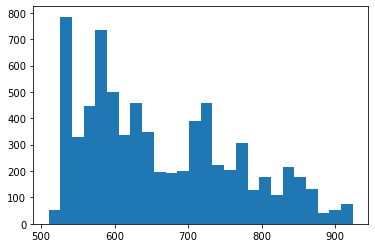

In [44]:
plt.hist(road_rides.altitude, bins="fd")
plt.show()

All entries contain altitude value. The sensor type is barometric. The resolution is 0.2m. Some noise is expected. Drift could also be expected in case of significant weather changes during the ride.

In [105]:
# road_rides[pd.isna(road_rides.altitude_increment)]
# road_rides[pd.isna(road_rides.distance_increment)]

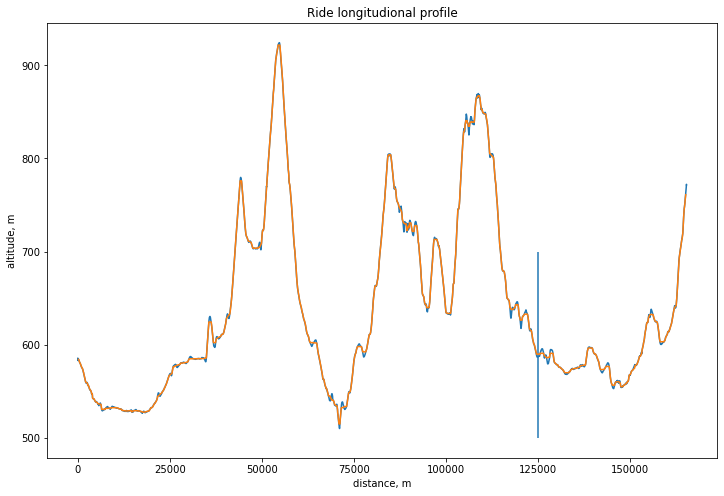

In [125]:
plt.figure(figsize=(12, 8))
plt.plot(road_rides.distance, road_rides.altitude)
plt.plot(road_rides.distance, road_rides.altitude.rolling(50, center=True).median())
plt.title("Ride longitudional profile")
plt.xlabel("distance, m")
plt.ylabel("altitude, m")
# plt.xlim(115000, 125000)
plt.vlines([125000], 500, 700)
plt.show()

The main factor for changing gear is the slope of the terrain. The steeper the terrain, the lower gear ratio is preferred in order to keep the cadence near optimum value. 

In [46]:
def calculate_slope(distance, delta_altitude):
    if distance < 1:
        return np.NaN
    return delta_altitude / distance        

In [47]:
road_rides["altitude_increment"] = road_rides.altitude.diff()

In [48]:
road_rides["slope"] = road_rides.apply(lambda x: calculate_slope(x.distance_increment, x.altitude_increment), axis=1)

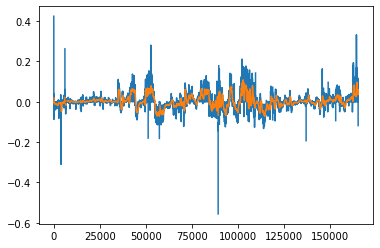

In [111]:
plt.plot(road_rides.distance, road_rides.slope)
plt.plot(road_rides.distance, road_rides.slope.rolling(20).mean())

# plt.ylim(-0.2,0.2)
plt.show()

In [50]:
road_rides[road_rides.slope < -0.3]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope
160,42.688214,23.334173,1,545.0,2021-06-27 05:08:21+00:00,111.0,0.0,3.219,3991.61,20,1.0,3.22,-1.0,-0.310559
3863,42.654297,23.822840,18,726.6,2021-06-27 08:24:41+00:00,117.0,0.0,2.155,89297.45,23,1.0,2.15,-0.8,-0.372093
3864,42.654304,23.822850,18,725.4,2021-06-27 08:24:43+00:00,117.0,0.0,0.000,89299.61,23,2.0,2.16,-1.2,-0.555556


In [51]:
road_rides[3860:3875]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope
3860,42.654127,23.822820,18,729.0,2021-06-27 08:24:37+00:00,121.0,0.0,6.429,89282.00,23,1.0,6.44,-0.2,-0.031056
3861,42.654183,23.822814,18,728.2,2021-06-27 08:24:38+00:00,119.0,0.0,5.561,89287.55,23,1.0,5.55,-0.8,-0.144144
3862,42.654273,23.822826,18,727.4,2021-06-27 08:24:40+00:00,117.0,0.0,3.508,89295.30,23,2.0,7.75,-0.8,-0.103226
3863,42.654297,23.822840,18,726.6,2021-06-27 08:24:41+00:00,117.0,0.0,2.155,89297.45,23,1.0,2.15,-0.8,-0.372093
3864,42.654304,23.822850,18,725.4,2021-06-27 08:24:43+00:00,117.0,0.0,0.000,89299.61,23,2.0,2.16,-1.2,-0.555556
3865,42.654304,23.822858,18,725.0,2021-06-27 08:24:44+00:00,119.0,0.0,0.000,89299.61,23,1.0,0.00,-0.4,NaN
3866,42.654304,23.822862,18,724.4,2021-06-27 08:24:45+00:00,120.0,0.0,0.000,89299.61,23,1.0,0.00,-0.6,NaN
3867,42.654304,23.822862,18,723.6,2021-06-27 08:24:48+00:00,123.0,0.0,0.000,89299.61,23,3.0,0.00,-0.8,NaN
3868,42.654304,23.822862,18,723.4,2021-06-27 08:24:49+00:00,123.0,0.0,0.000,89299.61,23,1.0,0.00,-0.2,NaN
3869,42.654304,23.822862,18,723.4,2021-06-27 08:24:50+00:00,123.0,0.0,0.000,89299.61,23,1.0,0.00,0.0,NaN


## Temperature

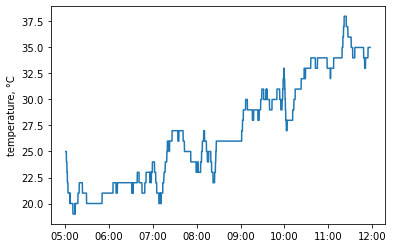

In [52]:
plt.plot(road_rides.timestamp, road_rides.temperature)
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.ylabel("temperature, °C")
plt.show()

Temperature increases towards lunch time. Nothing interesting.

## Generic correlations

In [53]:
road_rides.corr()

,latitude,longitude,lap,altitude,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope
latitude,1.000000,-0.252283,-0.349512,-0.240498,-0.171262,0.056859,-0.096773,-0.349504,-0.344116,0.003210,0.004569,0.089075,0.060920
longitude,-0.252283,1.000000,-0.385375,0.431167,0.052227,-0.032226,0.143518,-0.385880,-0.480230,-0.009993,-0.092884,-0.065018,-0.014261
lap,-0.349512,-0.385375,1.000000,0.104041,0.192141,0.019766,-0.053242,0.999500,0.940143,-0.000166,-0.022715,0.030640,0.042999
altitude,-0.240498,0.431167,0.104041,1.000000,0.072882,-0.144861,-0.113437,0.105784,-0.043706,-0.014530,-0.295854,0.008866,0.119744
heart_rate,-0.171262,0.052227,0.192141,0.072882,1.000000,0.554066,-0.166892,0.188692,0.142657,-0.025190,0.082495,0.519797,0.587240
cadence,0.056859,-0.032226,0.019766,-0.144861,0.554066,1.000000,0.092086,0.017199,0.024237,0.009313,0.265075,0.330491,0.324086
speed,-0.096773,0.143518,-0.053242,-0.113437,-0.166892,0.092086,1.000000,-0.057469,-0.058112,-0.021411,0.442122,-0.646810,-0.690545
distance,-0.349504,-0.385880,0.999500,0.105784,0.188692,0.017199,-0.057469,1.000000,0.939776,0.000502,-0.025220,0.030944,0.042986
temperature,-0.344116,-0.480230,0.940143,-0.043706,0.142657,0.024237,-0.058112,0.939776,1.000000,-0.000350,0.008732,0.029654,0.038533
duration,0.003210,-0.009993,-0.000166,-0.014530,-0.025190,0.009313,-0.021411,0.000502,-0.000350,1.000000,0.052995,0.043250,0.053767


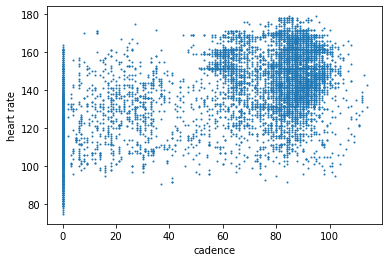

In [54]:
# some correlation between heart rate and cadance is seen; this is expected from scientific point of view.
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.xlabel("cadence")
plt.ylabel("heart rate")
plt.show()

There are some obvious correlations between lap number - distance and lap number - temperature with no added value.
The minimal correlation between cadence and heart rate does not add value too. 
Other possible correlation might appear between slope and heart rate.

# Gear ratio usage
## Calculating the gear ratios

By definition, the gear ratio is the ratio between the number of teeth on the chainring divided by the number of teeth on the selected rear cog. The gear ratio can be calculated from the speed and cadence.

In [55]:
TYRE_CIRCUMFERENCE = 2.105 # in m
gear_ratios = (road_rides.speed / TYRE_CIRCUMFERENCE) / (road_rides.cadence / 60) # dimensionless; number of chainring theeth divided by the cog theeth
gear_ratios.name = "gear_ratio"

In [56]:
road_rides = pd.concat([road_rides, gear_ratios], axis=1)
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN,NaN,NaN,NaN,2.909145
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0,4.73,2.0,0.422833,2.809382
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0,4.80,0.2,0.041667,4.271971
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0,4.79,-0.2,-0.041754,4.271971
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0,4.69,0.0,0.000000,4.172209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0,1.11,0.0,0.000000,1.265558
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0,5.23,0.0,0.000000,inf
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0,3.38,-0.4,-0.118343,inf
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0,0.00,0.0,NaN,0.000000


In [57]:
gear_ratios.min(), gear_ratios.max()

(0.0, inf)

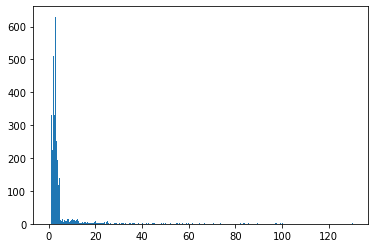

In [58]:
plt.hist(gear_ratios[gear_ratios < 200], bins="fd")
# plt.ylim(0,10)
plt.show()

In [59]:
gear_ratios[gear_ratios > 20].count()

990

There is an issue with such direct approach: dividing by 0 cadence results in infinity. When the bike is moved by inertia, the formula indicates infinite gear ratio; but in reality, in this case the gear ratio cannot be determined (any gear could be engaged when freewheeling). Not knowing the gear ratio when freewheeling is not a big concern as the rider is simply not turning the cranks. We should think of what is the best usage metric. Here are some proposals with comments:
- number of records in the dataframe - not good (even wrong) as the duration differs
- number of kilometers at a given gear ratio - would indicate high usage of fast gears; good resolution could be obtained.
- number of crank turns at a given gear ratio - assuming a constant power per rotation coming from the rider, would indicate the total energy used at a give ratio. However the resolution would be quite poor as the resolution of cadence and duration for each record is low.
- number of hours at a given gear ratio - if the power input from the rider is constant, this would also be indication for the total amount of energy spent at a give gear ratio. Resolution will be an issue, as each record could add 1s or 2s.
- number of chain engagement/disengagement in the cogs - good indicator for wear, but difficult to calculate with two chainrings.

The analysis will continue with a usage metric "distance traveled at a certain gear".

The highest possible gear ratio of the current setup can be calculated by dividing the teeth of the largest chainring to the teeth of the smallest cog. If we exclude any gear ratio higher than that, we will exclude the freewheeling.

In [60]:
CHAINRINGS = np.array([34, 50])
COGS = np.array([11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 28])
# slow_gears = CHAINRINGS[0] / COGS # it is not good idea to ride the chain at diagonal
# slow_gears = slow_gears[::-1]
# fast_gears = CHAINRINGS[1] / COGS #[:-3]
# fast_gears = fast_gears[::-1]
# lowest_gear = slow_gears[0]
# highest_gear = fast_gears[-1]
# lowest_gear, highest_gear

In [61]:
slow_gears = {}
fast_gears = {}
for cog in COGS[::-1]:
    slow_gears[f"{CHAINRINGS[0]}/{cog}"] = CHAINRINGS[0] / cog
    fast_gears[f"{CHAINRINGS[1]}/{cog}"] = CHAINRINGS[1] / cog    
lowest_gear = min(slow_gears.values())
highest_gear = max(fast_gears.values())
lowest_gear, highest_gear

(1.2142857142857142, 4.545454545454546)

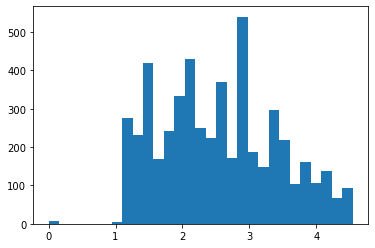

In [62]:
plt.hist(road_rides.gear_ratio[road_rides.gear_ratio <= highest_gear], bins="fd")
plt.show()

In [63]:
road_rides[pd.isna(road_rides.gear_ratio)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
108,42.682622,23.320529,1,557.2,2021-06-27 05:05:39+00:00,111.0,0.0,0.0,2705.98,21,1.0,0.00,0.0,NaN,NaN
110,42.682629,23.320544,1,556.8,2021-06-27 05:05:44+00:00,111.0,0.0,0.0,2707.60,21,3.0,0.00,-0.2,NaN,NaN
111,42.682629,23.320544,1,556.6,2021-06-27 05:05:45+00:00,112.0,0.0,0.0,2707.60,21,1.0,0.00,-0.2,NaN,NaN
259,42.696733,23.354435,2,537.0,2021-06-27 05:12:34+00:00,115.0,0.0,0.0,6054.83,19,5.0,1.53,0.4,0.261438,NaN
260,42.696733,23.354435,2,537.2,2021-06-27 05:12:38+00:00,112.0,0.0,0.0,6054.83,19,4.0,0.00,0.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,42.708705,23.251921,31,590.6,2021-06-27 11:21:36+00:00,124.0,0.0,0.0,153144.90,37,7.0,0.00,0.0,NaN,NaN
6646,42.708705,23.251921,31,590.6,2021-06-27 11:21:39+00:00,121.0,0.0,0.0,153144.90,37,3.0,0.00,0.0,NaN,NaN
6647,42.708705,23.251921,31,590.8,2021-06-27 11:21:43+00:00,119.0,0.0,0.0,153144.90,37,4.0,0.00,0.2,NaN,NaN
6648,42.708711,23.251916,31,590.8,2021-06-27 11:21:50+00:00,115.0,0.0,0.0,153145.30,38,7.0,0.40,0.0,NaN,NaN


In [64]:
road_rides[road_rides.gear_ratio == 0.0]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.0,51265.87,22,5.0,0.00,0.4,NaN,0.0
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.0,51265.87,22,2.0,0.00,0.2,NaN,0.0
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.0,57369.28,22,3.0,0.00,-0.2,NaN,0.0
2468,42.702764,23.925129,12,777.4,2021-06-27 07:14:42+00:00,103.0,7.0,0.0,57370.51,22,2.0,0.00,0.0,NaN,0.0
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.0,89611.47,26,1.0,0.00,0.2,NaN,0.0
6611,42.708705,23.251921,31,592.2,2021-06-27 11:18:34+00:00,143.0,4.0,0.0,153144.90,34,7.0,2.13,-0.2,-0.093897,0.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.0,165349.71,35,4.0,0.00,0.0,NaN,0.0


In [65]:
road_rides[2460:2470] # taking a closer look

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
2460,42.702922,23.924962,12,780.0,2021-06-27 07:14:27+00:00,100.0,0.0,4.451,57350.39,22,1.0,4.46,-0.2,-0.044843,inf
2461,42.702896,23.925008,12,779.4,2021-06-27 07:14:28+00:00,100.0,16.0,4.096,57354.48,22,1.0,4.09,-0.6,-0.146699,7.296912
2462,42.702855,23.925091,12,778.6,2021-06-27 07:14:30+00:00,99.0,16.0,3.368,57361.49,22,2.0,7.01,-0.8,-0.114123,6.000000
2463,42.702810,23.925139,12,778.0,2021-06-27 07:14:32+00:00,98.0,16.0,2.790,57367.08,22,2.0,5.59,-0.6,-0.107335,4.970309
2464,42.702791,23.925149,12,777.6,2021-06-27 07:14:33+00:00,97.0,16.0,2.202,57369.28,22,1.0,2.20,-0.4,-0.181818,3.922803
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.000,57369.28,22,3.0,0.00,-0.2,NaN,0.000000
2466,42.702775,23.925141,12,777.4,2021-06-27 07:14:39+00:00,101.0,7.0,0.411,57370.10,22,3.0,0.82,0.0,NaN,1.673566
2467,42.702765,23.925132,12,777.4,2021-06-27 07:14:40+00:00,102.0,7.0,0.411,57370.51,22,1.0,0.41,0.0,NaN,1.673566
2468,42.702764,23.925129,12,777.4,2021-06-27 07:14:42+00:00,103.0,7.0,0.000,57370.51,22,2.0,0.00,0.0,NaN,0.000000
2469,42.702764,23.925129,12,777.6,2021-06-27 07:14:47+00:00,100.0,0.0,0.000,57370.51,22,5.0,0.00,0.2,NaN,NaN


A couple of gear ratios are equal to 0, due to speed equal to 0 and some, non-zero, cadence. The data indicates this happens during transition periods to stop. It could also happen if the rider is back pedaling.

In [66]:
road_rides[road_rides.gear_ratio < lowest_gear]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
1953,42.717113,23.874516,11,768.4,2021-06-27 06:57:39+00:00,163.0,71.0,2.939,51255.97,22,1.0,2.94,0.2,0.068027,1.179887
1954,42.717120,23.874561,11,768.4,2021-06-27 06:57:40+00:00,163.0,71.0,2.557,51258.52,22,1.0,2.55,0.0,0.000000,1.026530
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.000,51265.87,22,5.0,0.00,0.4,NaN,0.000000
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.000,51265.87,22,2.0,0.00,0.2,NaN,0.000000
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.000,57369.28,22,3.0,0.00,-0.2,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,42.686017,23.138795,34,769.0,2021-06-27 11:56:47+00:00,136.0,66.0,2.734,165282.68,35,5.0,14.32,1.0,0.069832,1.180739
7254,42.685978,23.138758,34,769.6,2021-06-27 11:56:49+00:00,136.0,63.0,2.491,165287.86,35,2.0,5.18,0.6,0.115830,1.127022
7256,42.685882,23.138714,34,770.4,2021-06-27 11:56:54+00:00,136.0,52.0,2.025,165298.96,35,2.0,4.24,0.2,0.047170,1.109995
7258,42.685803,23.138667,34,771.4,2021-06-27 11:56:59+00:00,135.0,53.0,1.997,165309.97,35,1.0,2.00,0.2,0.100000,1.073993


In [67]:
road_rides[1950:1965] # takin a close look

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio
1950,42.717097,23.874179,11,766.2,2021-06-27 06:57:31+00:00,168.0,69.0,4.451,51227.01,22,1.0,4.46,0.2,0.044843,1.838686
1951,42.717112,23.874314,11,767.2,2021-06-27 06:57:34+00:00,167.0,26.0,3.779,51238.59,22,3.0,11.58,1.0,0.086356,4.142883
1952,42.717113,23.874475,11,768.2,2021-06-27 06:57:38+00:00,164.0,78.0,3.480,51253.03,22,4.0,14.44,1.0,0.069252,1.271697
1953,42.717113,23.874516,11,768.4,2021-06-27 06:57:39+00:00,163.0,71.0,2.939,51255.97,22,1.0,2.94,0.2,0.068027,1.179887
1954,42.717120,23.874561,11,768.4,2021-06-27 06:57:40+00:00,163.0,71.0,2.557,51258.52,22,1.0,2.55,0.0,0.000000,1.026530
1955,42.717119,23.874631,11,769.4,2021-06-27 06:57:44+00:00,159.0,17.0,1.409,51265.87,22,4.0,7.35,1.0,0.136054,2.362442
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.000,51265.87,22,5.0,0.00,0.4,NaN,0.000000
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.000,51265.87,22,2.0,0.00,0.2,NaN,0.000000
1958,42.717119,23.874636,11,769.8,2021-06-27 06:57:54+00:00,152.0,0.0,0.000,51265.87,22,3.0,0.00,-0.2,NaN,NaN
1959,42.717119,23.874636,11,769.8,2021-06-27 06:58:00+00:00,149.0,0.0,0.000,51265.87,23,6.0,0.00,0.0,NaN,NaN


In [68]:
# road_rides[7240:7265] # another closer look

Again, gear ratio out of range is happening during acceleration and stopping.

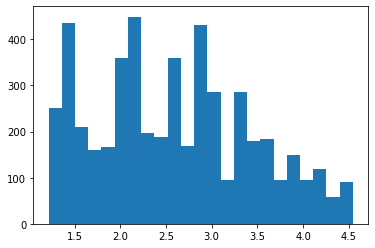

In [69]:
plt.hist(road_rides.gear_ratio[(road_rides.gear_ratio <= highest_gear) & (road_rides.gear_ratio >= lowest_gear)], bins="fd")
plt.show()

## EDA of currently used gear ratios

Currently, there are pre-defined gear-ratios. It might be possible to see indication for data discretization. The code below tries to find and evaluate the used gears from the 2x11 drive-train. 

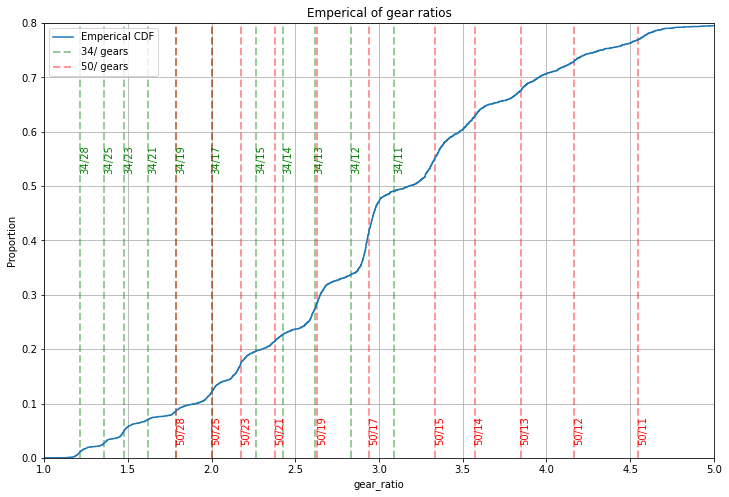

In [70]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=road_rides, x="gear_ratio", label=f"Emperical CDF", weights=road_rides.distance_increment)
plt.vlines(slow_gears.values(), 0, 1, color="green", lw=2, alpha=0.4, linestyles="dashed", label="34/ gears")
plt.vlines(fast_gears.values(), 0, 1, color="red", lw=2, alpha=0.4, linestyles="dashed", label="50/ gears")

for k, v in slow_gears.items():
    plt.text(v, 0.55, k, rotation=90, verticalalignment='center', color="green")
for k, v in fast_gears.items():
    plt.text(v, 0.05, k, rotation=90, verticalalignment='center', color="red")
    
plt.title("Emperical of geаr ratios")
plt.xlim(1, 5) 
plt.ylim(0, 0.8)
plt.legend()
plt.grid()
plt.show()

The ECDF plot clearly shows the used gears from the current setup. There is "normal" distribution around each gear. One can see the steep section crossing the expected gear ratio. There is noise that creates the tails. If there was no noise, the ECDF plot would look like staircase: vertical sections at the gear ratios, and a horizontal step to the next gear.

50/17 is the most used gear in terms of distance. The gears at both ends of the available ratios are less used (expected)

The rider should avoid diagonal chainlines (like 34/11), but data indicates significant usage of 50/23. It is recommended to use either 34/17 or 34/15.

About 20% of the time the rider is freewheeling.

The following code calculates the most likely gear engaged for each row in the dataframe. 
Applied rules for data discretization:
- The nearest gear ratio will be selected
- the range for border gears will be symmetrical about the nominal
- gear ratios higher than the fastest bin will be classified as freewheeling
- for moderate gear ratios, the most proper gear will be selected
- the slowest gear to use the big chainring will be assumed 50/21


In [71]:
# road_rides[road_rides.gear_ratio == 0]

In [72]:
# edges = []
# for i in range(len(available_ratios)-1):
#     edges.append(0.5 * (available_ratios[i] + available_ratios[i+1]))
# edges.append(2*available_ratios[0] - edges[0])
# edges.append(2*available_ratios[-1] - edges[-2]) # one value has already been added to the end
# edges = np.array(edges)
# edges = np.sort(edges)
# edges

In [73]:
# plt.hist(road_rides.gear_ratio[(road_rides.gear_ratio <= edges[-1]) & (road_rides.gear_ratio >= edges[0])], bins=edges, density=True)
# plt.show()

In [74]:
# road_rides

In [126]:
COGS

array([11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 28])

In [76]:
34/14

2.4285714285714284

In [77]:
50/21

2.380952380952381

In [127]:
def calculate_suitable_gear_2_11(ratio) -> str:
    """
    returns the most proper gear combo
    
    """
    if ratio == 0 or pd.isna(ratio):
        return "stationary"
    if ratio > fast_gears["50/11"] + 0.5 * (fast_gears["50/11"] - fast_gears["50/12"]):
        return "freewheeling"
    if ratio < 0.5 * (fast_gears["50/21"] + slow_gears["34/15"]): 
        front_teeth = CHAINRINGS.min()
    else:
        front_teeth = CHAINRINGS.max()
    diffrence_to_possible_ratios = np.abs(front_teeth / COGS - ratio)
    cog_index = diffrence_to_possible_ratios.argmin()
    rear_teeth = COGS[cog_index]
    return f"{front_teeth}/{rear_teeth}"


#unit test of the dunction
# calculate_suitable_gear_2_11(np.nan)
# calculate_suitable_gear_2_11(np.inf)
x = np.linspace(0, 5, 40)
calculate_suitable_gear_2_11_v = np.vectorize(calculate_suitable_gear_2_11)
calculate_suitable_gear_2_11_v(x)

# calculate_suitable_gear_2_11(2.596469)
# calculate_suitable_gear_2_11(2.372232)

array(['stationary', '34/28', '34/28', '34/28', '34/28', '34/28', '34/28',
       '34/28', '34/28', '34/28', '34/28', '34/25', '34/23', '34/21',
       '34/19', '34/17', '34/17', '34/15', '34/15', '50/21', '50/19',
       '50/19', '50/17', '50/17', '50/17', '50/15', '50/15', '50/14',
       '50/14', '50/13', '50/13', '50/13', '50/12', '50/12', '50/11',
       '50/11', '50/11', 'freewheeling', 'freewheeling', 'freewheeling'],
      dtype='<U12')

In [128]:
road_rides["gear"] = road_rides.gear_ratio.apply(calculate_suitable_gear_2_11)

In [129]:
used_gears = road_rides["gear"].unique()
all_gears = ['stationary',
            '34/28','34/25','34/23','34/21','34/19','34/17','34/15',
            '50/21', '50/19','50/17','50/15','50/14','50/13','50/12','50/11',
            'freewheeling']
ordered_gears = [el for el in all_gears if el in used_gears]
road_rides.gear = pd.Categorical(road_rides.gear, ordered=True, categories = ordered_gears)

In [81]:
# road_rides.gear.unique()

In [82]:
# road_rides["gear"] = road_rides.gear_ratio.apply(calculate_suitable_gear_2_11)
# used_gears = road_rides["gear"].unique()
# print(used_gears)
# all_gears = ['34/28','34/25','34/23','34/21','34/19','34/17','34/15',
#                 '50/21', '50/19','50/17','50/15','50/14','50/13','50/12','50/11',
#                 'freewheeling']
# ordred_gears = [el for el in all_gears if el in used_gears]
# print(ordred_gears)

# road_rides.gear = road_rides.gear.astype("category")
# road_rides.gear = pd.Categorical(road_rides.gear, ordered=True, categories = ordered_gears)

In [83]:
# road_rides[pd.isna(road_rides.gear)]

In [84]:
# plt.plot(road_rides.distance, gear_ratios, "o-")
# plt.ylim(1, 20)
# plt.xlim(0, 250)
# plt.grid()
# plt.show()

In [85]:
# road_rides.gear.min()

In [86]:
# plt.plot(road_rides.distance, road_rides.gear)
# plt.xlim(0, 25000)
# # plt.yticks([0, 1, 2, 3])
# plt.show()

In [87]:
# road_rides.plot(y="gear")

In [88]:
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,distance_increment,altitude_increment,slope,gear_ratio,gear
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN,NaN,NaN,NaN,2.909145,50/17
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0,4.73,2.0,0.422833,2.809382,50/17
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0,4.80,0.2,0.041667,4.271971,50/12
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0,4.79,-0.2,-0.041754,4.271971,50/12
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0,4.69,0.0,0.000000,4.172209,50/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0,1.11,0.0,0.000000,1.265558,34/28
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0,5.23,0.0,0.000000,inf,freewheeling
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0,3.38,-0.4,-0.118343,inf,freewheeling
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0,0.00,0.0,NaN,0.000000,stationary


In [130]:
gear_stats = pd.DataFrame()
gear_stats["mean_speed"] = road_rides.groupby("gear").speed.mean()
gear_stats["mean_gear_ratio"] = road_rides.groupby("gear").gear_ratio.mean()
gear_stats["distance"] = road_rides.groupby("gear").distance_increment.sum()
gear_stats["mean_cadence"] = road_rides.groupby("gear").cadence.mean()
gear_stats["mean_heart_rate"] = road_rides.groupby("gear").heart_rate.mean()
# it would be really good to have slope in this dataframe

In [131]:
gear_stats

,mean_speed,mean_gear_ratio,distance,mean_cadence,mean_heart_rate
gear,,,,,
stationary,0.022806,0.000000,28.42,0.372483,102.317647
34/28,3.370931,1.211440,3365.40,79.302181,157.320872
34/25,4.057477,1.357835,2524.34,85.147208,163.527919
34/23,4.487025,1.479166,4589.02,86.480296,158.834975
34/21,4.798988,1.617271,2099.07,84.690909,156.321212
34/19,4.784509,1.796223,3822.84,75.966038,153.509434
34/17,5.324280,2.023313,8814.74,75.071571,153.691849
34/15,5.683039,2.200634,8245.37,73.663043,150.419565
50/21,6.521417,2.401223,5745.75,77.416667,147.257576


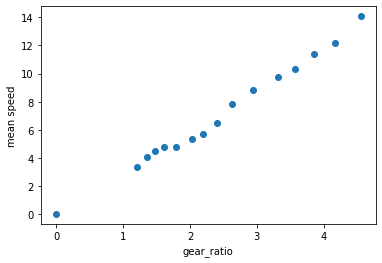

In [132]:
plt.scatter(gear_stats.mean_gear_ratio, gear_stats.mean_speed)
plt.xlabel("gear_ratio")
plt.ylabel("mean speed")
plt.show()

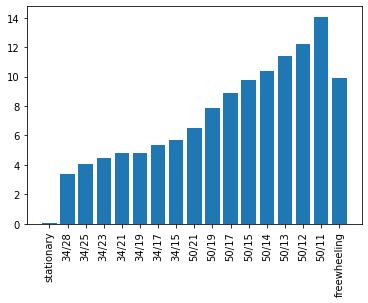

In [133]:
# plt.figure(figsize=(12,8))
plt.bar(gear_stats.index, gear_stats.mean_speed)
plt.xticks(rotation=90)
plt.show()

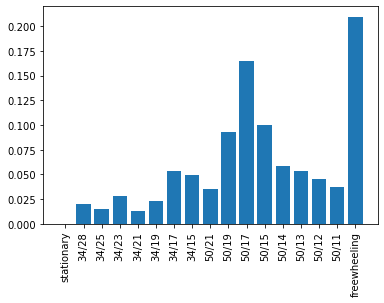

In [134]:
plt.bar(gear_stats.index, gear_stats.distance/gear_stats.distance.sum())
plt.xticks(rotation=90)
plt.show()

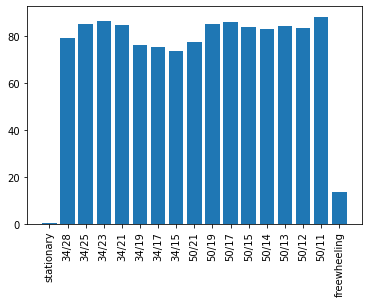

In [135]:
plt.bar(gear_stats.index, gear_stats.mean_cadence)
plt.xticks(rotation=90)
plt.show()

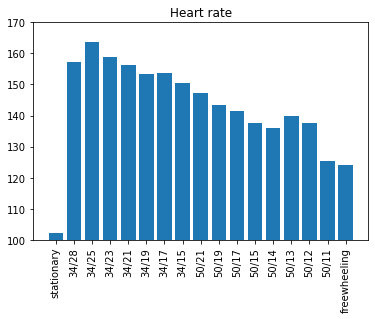

In [136]:
plt.bar(gear_stats.index, gear_stats.mean_heart_rate)
plt.title("Heart rate")
plt.xticks(rotation=90)
plt.ylim(100, 170)
plt.show()

Gear statistic observations:
- the higher the gear ratio, the higher the mean speed - expected
- freewheeling with moderate speed - expected
- freewheeling covers the longest distance
- 50/17 the most used gear in terms of distance
- cadence approximately the same between gears 
- heart rate higher at low gears. The rider is putting more power to overcome climbs than to fight aerodynamic drag.

Very interesting graph. It outlines point families on certain curves. These curves represent the gear ratios. Note how the length of the curve indicates it's usable range.

In [96]:
# 3debug
# road_rides_powered.slope

NameError: name 'road_rides_powered' is not defined

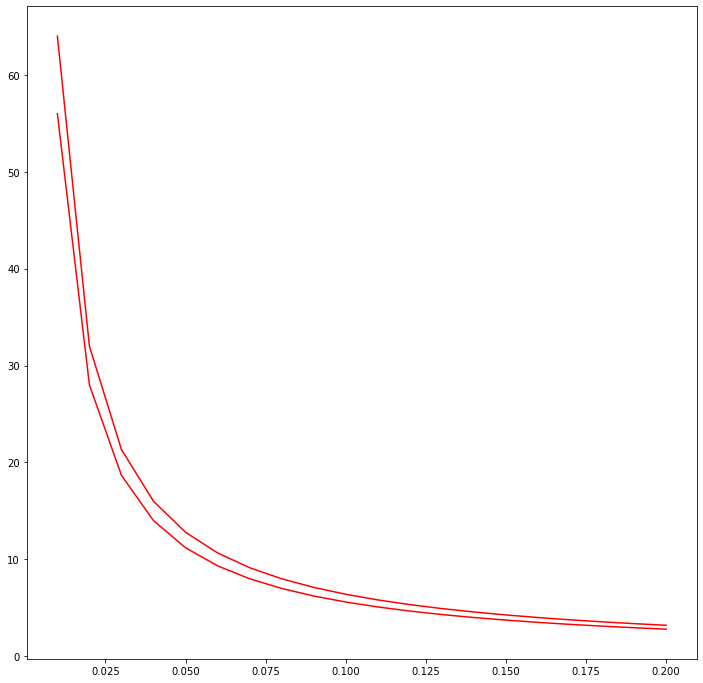

In [97]:
x = np.linspace(0.01, 0.2, 20)
# coef = 
y = 8* 0.07/x
y2 = 8* 0.08/x

plt.figure(figsize=(12, 12))
plt.plot(x, y, color="red")
plt.plot(x, y2, color="red")

plt.hist2d(road_rides_powered.slope, road_rides_powered.speed, bins=300, cmap=plt.cm.jet, cmin=1, cmax=10)
plt.title("")
plt.xlabel("slope")
plt.ylabel("speed, m/s")
# plt.gca().set_aspect('equal')
plt.xlim(-0.1, 0.2)
plt.grid()
plt.plot()

The strange line pattern collide with the equation slope * speed = const, or 
(d(amplitude) / d(distance)) * (d(distance) / dt) =d(amplitude) / dt = const

In [ ]:
road_rides_powered.reset_index(inplace=True)

In [ ]:
road_rides_powered[(road_rides_powered.slope * road_rides_powered.speed > 8*0.07) & (road_rides_powered.slope * road_rides_powered.speed < 8*0.08)]

In [ ]:
road_rides_powered[835:840]

In [ ]:
(road_rides_powered.altitude.iloc[837] - road_rides_powered.altitude.iloc[836] ) / (road_rides_powered.distance.iloc[837] - road_rides_powered.distance.iloc[836] )

Let's try to plot the cadence as contour on the graph above. 

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="slope", y="speed", hue="cadence",
            alpha=.5, palette=sns.color_palette("flare", as_cmap=True),
            height=6, data=road_rides_powered)
plt.xlim(-0.1, 0.2)
plt.show()

In [ ]:
plt.scatter(road_rides_powered.slope, road_rides_powered.cadence, s=1)

In [ ]:
plt.scatter(road_rides_powered.cadence, road_rides_powered.slope, s=1)


In [ ]:
gear_ratios.name = "gear_r"
road_rides = pd.concat([road_rides, gear_ratios], axis=1)

In [ ]:
road_rides[(road_rides.gear_r > 20) & (road_rides.gear_r < 100)]

## Slopes

In [ ]:
slopes = {0: np.nan}
for i in range(1, len(road_rides)):
    delta_dist = (road_rides.distance.iloc[i] - road_rides.distance.iloc[i-1]) 
    if delta_dist != 0.0 and \
        road_rides.speed.iloc[i] > 1 and \
        road_rides.speed.iloc[i-1] > 1: # to make sure the rider is moving
        slopes[i] = (road_rides.altitude.iloc[i] - road_rides.altitude.iloc[i-1]) / delta_dist
        
    else:
        slopes[i] = np.nan
slopes = pd.Series(slopes)
slopes.name = "slope"

In [ ]:
road_rides = pd.concat([road_rides, slopes], axis=1)

In [ ]:
road_rides

More columns will be added to aid the analysis.

In [ ]:
road_rides.corr()

In [ ]:
plt.scatter(road_rides.speed, road_rides.slope, s=1)
# plt.ylim(-1, 1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.altitude, s=1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.slope, s=1)

In [ ]:
y = road_rides.slope.rolling(50, win_type='triang').mean()
plt.scatter(road_rides.distance, y, s=1)

In [ ]:
grads = np.gradient(road_rides.altitude, road_rides.distance, edge_order=2)

kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
grads_convolved_10 = np.convolve(grads, kernel, mode='same')

plt.figure(figsize=(16,8))
plt.scatter(road_rides.distance, grads, s=1)
plt.plot(road_rides.distance, grads_convolved_10, color="red")
plt.ylim(-0.1, 0.1)

In [ ]:
road_rides[road_rides.slope < -0.2]

In [ ]:
road_rides[150:170]

In [ ]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

In [ ]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [ ]:
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.show()

In [ ]:
plt.plot(road_rides.distance, road_rides.altitude)
plt.show()

In [ ]:
road_rides.cadence.mean()

In [ ]:
road_rides[road_rides.cadence < 10]

In [ ]:
records_df = get_dataframe(r"data\2021-06-28-12-06-56.fit")

In [ ]:
records_df

In [ ]:
road_rides.sample(10)

In [ ]:
plt.plot(road_rides.distance, road_rides.speed)

In [ ]:
road_rides.describe().T

In [ ]:
records_df.distance.tail(1).tolist()[0]

In [ ]:
plt.plot(records_df.timestamp, records_df.temperature)

In [ ]:
records_df.dtypes

In [ ]:
records_df.altitude.hist(bins=20, density=True)
plt.xlabel("altitude")
plt.ylabel("count")
plt.show()

In [ ]:
plt.plot(records_df.distance, records_df.speed)

In [ ]:
plt.plot(records_df.distance, records_df.altitude)

In [ ]:
plt.plot(records_df.distance, records_df.heart_rate)

In [ ]:
records_df.corr()

# References
https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418
